In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TempGB = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\TEMP_GB_20210101-20221231.csv")

TempGB = pd.DataFrame({"Date": TempGB.iloc[:978,1],
                       "GB Average Temperature [deg C]": TempGB.iloc[:978,3].astype(float)})

TempGB = TempGB.drop_duplicates(subset=["Date"])
TempGB = TempGB.iloc[::-1]
TempGB = TempGB.reset_index()
del TempGB['index']

TempGB.loc[80.5] = ['23/03/2021', (TempGB.iloc[80,1]+TempGB.iloc[81,1])/2]
TempGB.loc[278.5] = ['08/10/2021', (TempGB.iloc[278,1]+TempGB.iloc[279,1])/2]
TempGB = TempGB.sort_index().reset_index(drop=True)

TempGB["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")
TempGB.iloc[341,1] = (TempGB.iloc[342,1]+TempGB.iloc[340,1])/2
TempGB.iloc[172,1] = (TempGB.iloc[171,1]+TempGB.iloc[173,1])/2
TempGB.iloc[511,1] = (TempGB.iloc[510,1]+TempGB.iloc[512,1])/2
TempGB["GB Average Temperature [deg C]"] = TempGB["GB Average Temperature [deg C]"].round(3)

TempGB = pd.DataFrame(TempGB)

print(TempGB.to_string())
#print(TempGB.dtypes())



          Date  GB Average Temperature [deg C]
0   2021-01-01                           0.900
1   2021-01-02                           1.000
2   2021-01-03                           1.400
3   2021-01-04                           1.400
4   2021-01-05                           1.600
5   2021-01-06                           1.500
6   2021-01-07                           0.400
7   2021-01-08                           0.400
8   2021-01-09                           0.400
9   2021-01-10                           1.100
10  2021-01-11                           3.100
11  2021-01-12                           3.500
12  2021-01-13                           3.700
13  2021-01-14                           2.900
14  2021-01-15                           1.700
15  2021-01-16                           2.800
16  2021-01-17                           3.500
17  2021-01-18                           3.800
18  2021-01-19                           5.200
19  2021-01-20                           4.900
20  2021-01-2

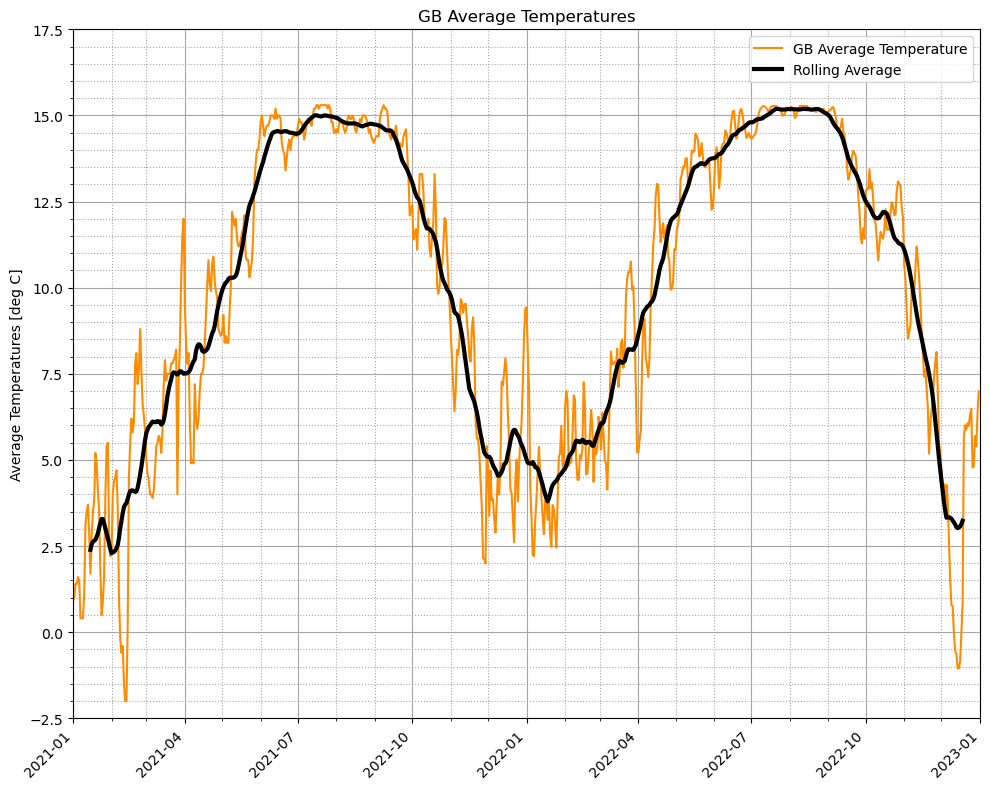

(18628.0, 19358.0)


In [7]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Average Temperatures')
plt.ylabel('Average Temperatures [deg C]')

ax.plot(TempGB["Date"], TempGB["GB Average Temperature [deg C]"], color = "darkorange", label="GB Average Temperature")
ax.plot(TempGB["Date"], TempGB["GB Average Temperature [deg C]"].rolling(28,  center=True).mean(), linewidth=3, color = "black", label="Rolling Average")
#plt.fill_between(TempGB["Date"], TempGB["GB Average Temperature [deg C]"].astype(float), color="darkorange")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(-2.5, 17.5)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

          Date  GB Average Temperature [deg C]  GB Electricity DA [EUR/MWh]
0   2021-01-01                           0.900                        68.40
1   2021-01-02                           1.000                        71.54
2   2021-01-03                           1.400                        65.27
3   2021-01-04                           1.400                        67.32
4   2021-01-05                           1.600                        67.40
5   2021-01-06                           1.500                       160.07
6   2021-01-07                           0.400                       101.79
7   2021-01-08                           0.400                       115.46
8   2021-01-09                           0.400                        74.13
9   2021-01-10                           1.100                        76.47
10  2021-01-11                           3.100                        71.51
11  2021-01-12                           3.500                       126.26
12  2021-01-

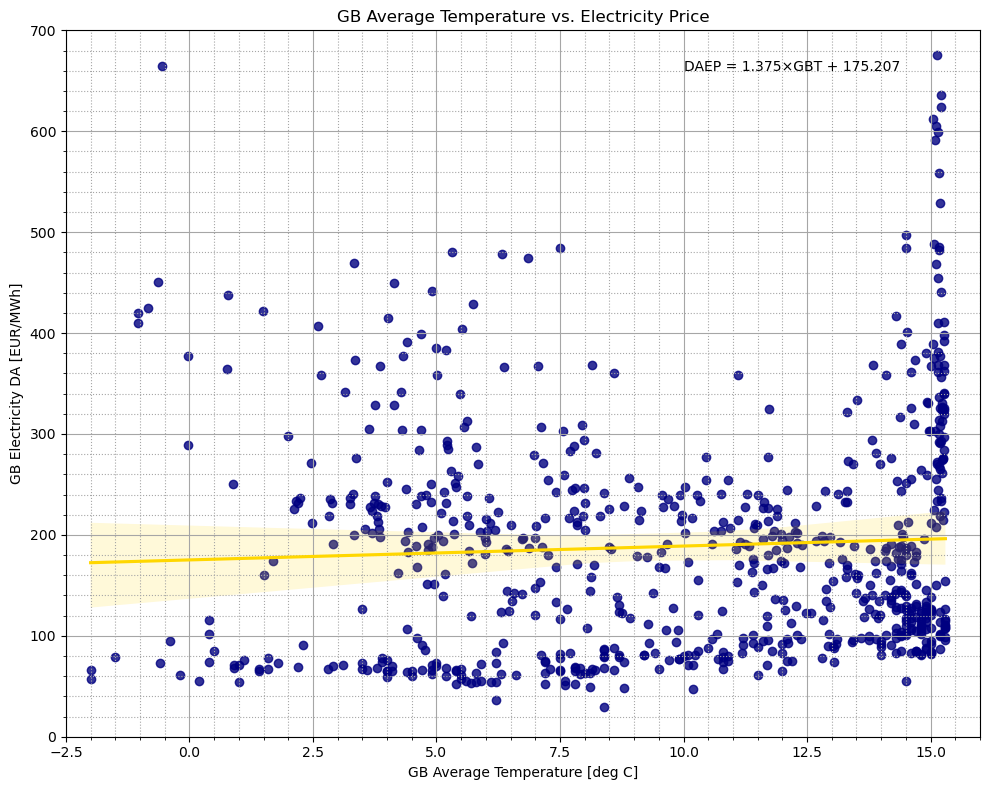

In [8]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

%store -r BZGB

CompTemp = TempGB
CompTemp["GB Electricity DA [EUR/MWh]"] = BZGB["BZN|GB"].astype(float)

print(CompTemp.iloc[:, :].to_string())
print(CompTemp.dtypes)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Average Temperature vs. Electricity Price')
plt.xlabel('GB Average Temperature [deg C]')
plt.ylabel('Electricity DA Price [EUR/MWh]')

sns.regplot(x=CompTemp.iloc[:, 1], 
            y=CompTemp.iloc[:, 2], 
            scatter = True, ci = 100, fit_reg = True,
            scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"})

#slope, intercept, r, CompTemp, sterr = scipy.stats.linregress(x=CompTemp["GB Average Temperature [deg C]"],
#                                                       y=CompTemp["GB Electricity DA [EUR/MWh]"])

slope, intercept, r, CompTemp, sterr = scipy.stats.linregress(x=CompTemp.iloc[:, 1],
                                                       y=CompTemp.iloc[:, 2])

plt.text(10, 660, 'DAEP = ' + str(round(slope,3)) + '×GBT + ' + str(round(intercept,3)))

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(-2.5, 16)
plt.ylim(0, 700)
plt.tight_layout()

plt.show()

In [9]:
%store TempGB
del TempGB

Stored 'TempGB' (DataFrame)
